### Preparation

In [24]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.linear_model as skl
import sklearn.preprocessing as skp
import os
from matplotlib import pyplot as plt
import copy as cp

BLUE_LIGHT = str('#00CCFF')
GREEN_LIGHT = str('#00CC00')
RED_LIGHT = str('#FF3333')
DATA_DIR = 'data'

In [25]:
data_df = pd.read_csv(os.path.join(DATA_DIR, 'covid_data.csv'))
                  #usecols=['date','case_by_day', 'case_by_time', 'death_by_day', 'death_by_time', 'recovered_by_time'])
data_df['case_by_time'] = data_df['case_by_time'] - data_df['recovered_by_time'] - data_df['death_by_time']

In [26]:
data_df = data_df.iloc[139:,:]
data_df['date'] -= 139

In [37]:
data_df.tail()

,date,case_by_day,case_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time,total_injected_by_time,once_injected_by_time,twice_injected_by_time
254,115,16369,330283,166,33515,28369,1465150,147350872,8606523,69457833
255,116,16106,331389,223,33738,14633,1479783,147638276,8453959,69685313
256,117,16260,338461,238,33976,8990,1488773,147678731,8493838,69685313
257,118,15556,349040,197,34173,12210,1500983,147722605,8537436,69685313
258,119,14596,273623,206,34379,89842,1590825,148350360,7980103,70313068


### Smooth

In [43]:
def smooth(data_array, k = 7):
    copy = cp.deepcopy(data_array)
    for i in range(int(k/2), len(data_array) - int(k/2)):
        temp = 0
        for j in range(k):
            temp += float(copy[i + j - int(k/2)] / k)
    return copy
        

In [45]:
X_date = data_df.iloc[:,0]
Y_cases =  data_df.iloc[:,1].values
Y_deaths = data_df.iloc[:,2].values
Y_recovered = data_df.iloc[:,2].values

def drawCase(X, Y, color):
        plt.figure(figsize=(9,3))
        
        ax = plt.axes()
        #ax.grid(linewidth=0.4, color='#8f8f8f') 
        
        #ax.set_facecolor("black") 
        ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
        ax.set_ylabel('Number of Confirmed Cases\n',
                size=25,color='#4bb4f2')
        
        ax.plot(X,Y,
                color=color,
                linewidth=4,
                markersize=15,
                markeredgecolor=RED_LIGHT)

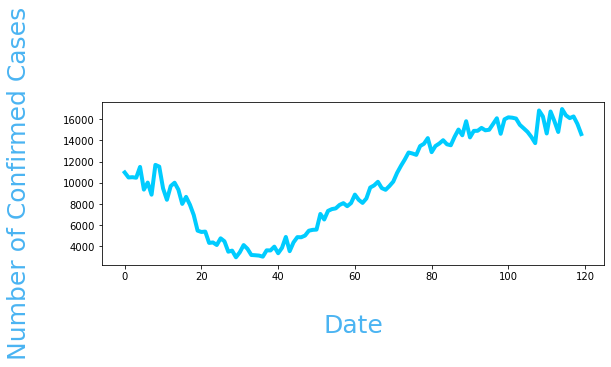

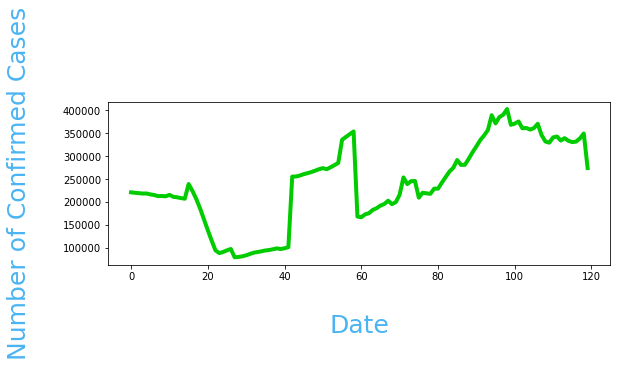

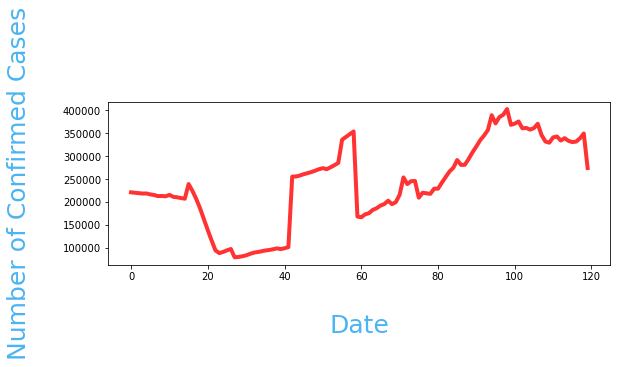

In [46]:
drawCase(X_date, Y_cases, BLUE_LIGHT)
drawCase(X_date, Y_recovered, GREEN_LIGHT)
drawCase(X_date, Y_deaths, RED_LIGHT)

#### Smooth graph

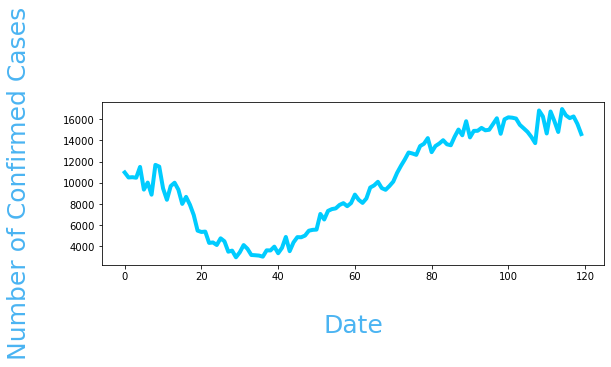

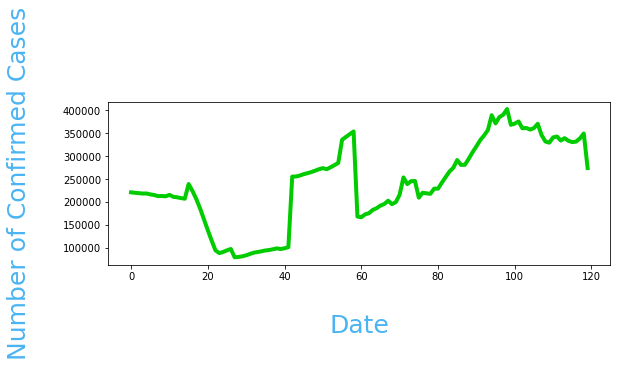

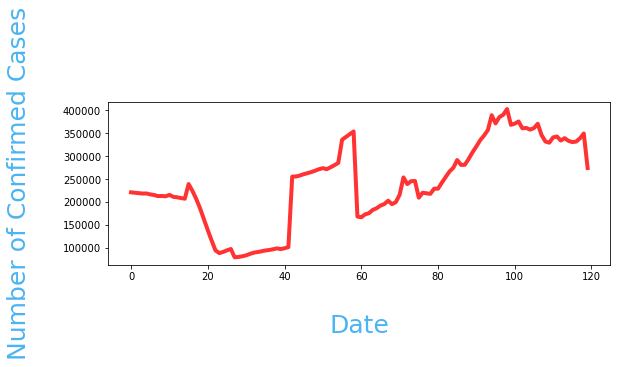

In [51]:
drawCase(X_date, smooth(Y_cases), BLUE_LIGHT)
drawCase(X_date, smooth(Y_recovered), GREEN_LIGHT)
drawCase(X_date, smooth(Y_deaths), RED_LIGHT)

## Linear Regression

In [8]:
future = list(range(289))

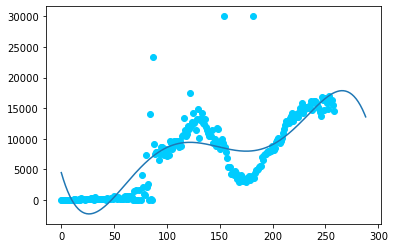

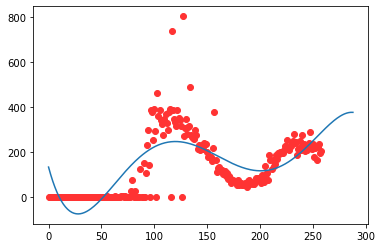

In [9]:
X_date = data_df.iloc[:,0].values
Y_cases = np.clip(data_df.iloc[:,1].values, 0, 30000)
Y_deaths = data_df.iloc[:,3].values


casesModel = np.poly1d(np.polyfit(X_date, Y_cases, 5))
deathsModel = np.poly1d(np.polyfit(X_date, Y_deaths, 5))


plt.scatter(X_date, Y_cases, c=BLUE_LIGHT)
plt.plot(future, casesModel(future))
plt.show()

plt.scatter(X_date, Y_deaths, c=RED_LIGHT)
plt.plot(future, deathsModel(future))
plt.show()



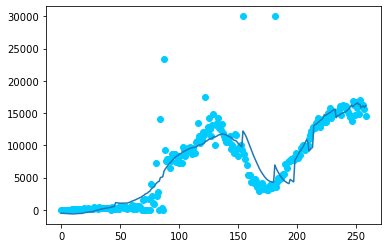

In [11]:
X = data_df[['date', 'case_by_time']]
Y = np.clip(data_df.iloc[:,1].values, 0, 25000)

poly = skp.PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
regr = skl.LinearRegression()
regr.fit(X_poly, Y)


plt.scatter(X_date, Y_cases, c=BLUE_LIGHT)
plt.plot(X_date, regr.predict(X_poly))

#print(regr.predict(poly.fit_transform(260, 1892743)))

plt.show()
